## Linear Regression Assignment
In a watershed monitoring project, automated samplers are often used to collect water samples. However, these automated samplers may fail from time to time due to various instrumentation issues, such as power failure and damaged instruments. When the automated sampler failed to collect water samples, it leaves a data gap from a certain period of time. <br> 

Base flow nutrient concentration data are often linearly interpolated (or sometimes extrapolated) using nutrient data of the last and next sample collected. This approach cannot be applied to event flow nutrient and sediment (hereinafter refer as nutrient) data, especially phosphorus (P) and sediment (TSS), because of the large variations in nutrient concentration that can be caused by flow. <br>

The objectived of this task are to: <br>
1) develop a suitable model using existing dissolved reactive P (DRP), total P (TP), and TSS <br>
2) predict the missing DRP, TP, TSS data using the model developed in (1)

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats


In [21]:
# import data from excel
data = pd.read_excel('JY_linear_reg_data.xlsx', sheet_name = 'Data')
data.head()

,Sample date,Site,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L)
0,2015-05-19,S11,0.028210,0.018,0.0015,22.333667,19.264296
1,2015-06-16,S11,0.189993,0.027,0.1770,1006.666667,892.000000
2,2015-06-30,S11,1.296460,0.203,1.2590,1338.666667,1194.666667
3,2015-08-18,S11,0.131722,0.050,1.3280,2026.000000,1812.000000
4,2015-08-25,S11,0.120204,0.010,3.1180,1722.000000,1560.000000


In [22]:
# drop 'VSS' column, rename the columns into shorter names

data = data.drop(columns=['VSS (mg/L)'])
data = data.rename(columns={'Sample date': 'Date', 'Flow (cms)':'Flow', 'DRP (mg P/L)':'DRP', 'TP (mg P/L)':'TP', 'TSS (mg/L)':'TSS'})
data.head()

,Date,Site,Flow,DRP,TP,TSS
0,2015-05-19,S11,0.028210,0.018,0.0015,22.333667
1,2015-06-16,S11,0.189993,0.027,0.1770,1006.666667
2,2015-06-30,S11,1.296460,0.203,1.2590,1338.666667
3,2015-08-18,S11,0.131722,0.050,1.3280,2026.000000
4,2015-08-25,S11,0.120204,0.010,3.1180,1722.000000


In [117]:
data_11 = data[data['Site'] == 'S11']
data_12 = data[data['Site'] == 'S12']
print(data_11.tail())
print(data_12.tail())

         Date Site      Flow    DRP     TP         TSS
24 2018-09-11  S11  0.120500  0.052  0.338  363.333333
25 2018-09-11  S11  0.115396  0.014  0.498  162.000000
26 2018-09-26  S11  0.085015  0.010  0.293  474.500000
27 2018-10-11  S11  0.113744  0.047  0.190  148.000000
28 2018-10-11  S11  0.156634    NaN    NaN         NaN
         Date Site      Flow    DRP     TP        TSS
60 2018-08-31  S12  0.028923    NaN    NaN        NaN
61 2018-09-06  S12  0.024730    NaN    NaN        NaN
62 2018-09-26  S12  0.022594    NaN    NaN        NaN
63 2018-10-11  S12  0.024522  0.001  0.042  11.666667
64 2018-10-11  S12  0.044039  0.003  0.040  20.333333


In [43]:
# check the number of null values
print('S11')
print(data_11.isnull().sum())
print('S12')
print(data_12.isnull().sum())

S11
Date    0
Site    0
Flow    0
DRP     3
TP      3
TSS     3
dtype: int64
S12
Date    0
Site    0
Flow    0
DRP     4
TP      4
TSS     4
dtype: int64


In [47]:
# create separate dataframe that only contain null values
data_11_null = data_11[data_11.isnull().any(axis=1)]
data_12_null = data_12[data_12.isnull().any(axis=1)]
print('S11')
print(data_11_null)
print('S12')
print(data_12_null)

S11
         Date Site      Flow  DRP  TP  TSS
21 2018-06-22  S11  0.103414  NaN NaN  NaN
22 2018-06-27  S11  0.189099  NaN NaN  NaN
28 2018-10-11  S11  0.156634  NaN NaN  NaN
S12
         Date Site      Flow  DRP  TP  TSS
59 2018-08-21  S12  0.128687  NaN NaN  NaN
60 2018-08-31  S12  0.028923  NaN NaN  NaN
61 2018-09-06  S12  0.024730  NaN NaN  NaN
62 2018-09-26  S12  0.022594  NaN NaN  NaN


In [195]:
# drop the null values 
data_11 = data_11.dropna()
data_12 = data_12.dropna()
print('S11')
print(data_11.isnull().sum())
print('S12')
print(data_12.isnull().sum())

S11
Date    0
Site    0
Flow    0
DRP     0
TP      0
TSS     0
dtype: int64
S12
Date    0
Site    0
Flow    0
DRP     0
TP      0
TSS     0
dtype: int64


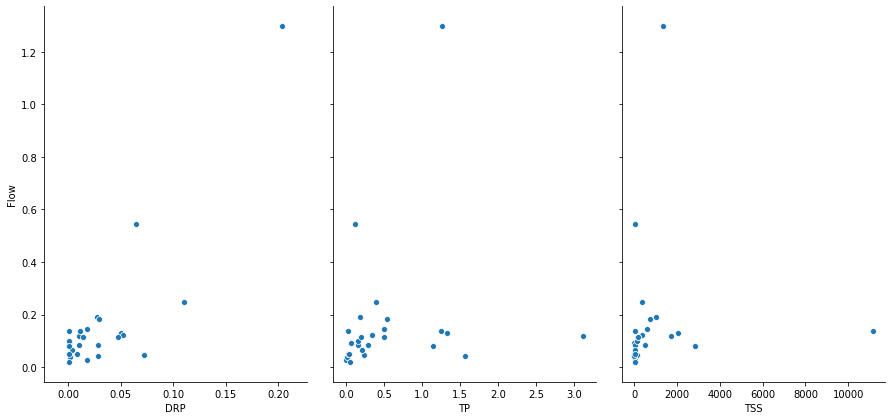

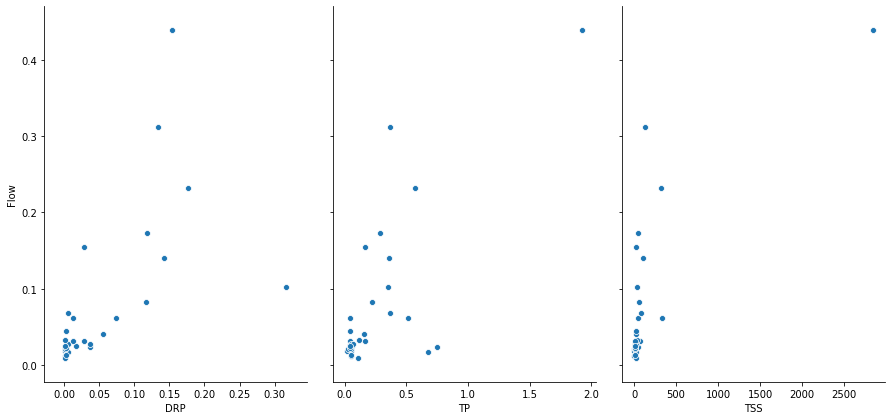

In [50]:
# visualize the relationship between flow and responses
sns.pairplot(data_11, x_vars=['DRP', 'TP', 'TSS'], y_vars=['Flow'], height=6, aspect=0.7)
sns.pairplot(data_12, x_vars=['DRP', 'TP', 'TSS'], y_vars=['Flow'], height=6, aspect=0.7)

# Objective 1
Develop a suitable model using existing dissolved reactive P (DRP), total P (TP), and TSS

In [80]:
list_of_comparisons = ['DRP ~ Flow', 'TP ~ Flow', 'TSS ~ Flow']

for x in list_of_comparisons:
    print(x)
    result = smf.ols(formula=x, data=data_11).fit()
    print(result.summary())

DRP ~ Flow
                            OLS Regression Results                            
Dep. Variable:                    DRP   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     61.48
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           4.50e-08
Time:                        11:01:56   Log-Likelihood:                 61.156
No. Observations:                  26   AIC:                            -118.3
Df Residuals:                      24   BIC:                            -115.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0068      0.006      1.1

In [52]:
list_of_comparisons = ['DRP ~ Flow', 'TP ~ Flow', 'TSS ~ Flow']

for x in list_of_comparisons:
    print(x)
    result = smf.ols(formula=x, data=data_12).fit()
    print(result.summary())

DRP ~ Flow
                            OLS Regression Results                            
Dep. Variable:                    DRP   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     21.10
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           7.32e-05
Time:                        10:13:48   Log-Likelihood:                 47.461
No. Observations:                  32   AIC:                            -90.92
Df Residuals:                      30   BIC:                            -87.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0116      0.013      0.9

# Discussion for objective 1
<font color=red>
The quality of the OLS models was evaluated based on p-value and R2: <br>
1) S11-DRP - will work well <br>
2) S11-TP - will not work well <br>
3) S11-TSS - will not work well based on R2, p-value, and high Y-intercept value <br>
4) S12- DRP - will work well <br>
5) S12 - TP - will work well <br>
6) S12 - TSS - appear that it will work well based on R2 and p-value, but the Y-intercept is largely negative
</font>

# Objective 2
Predict the missing DRP, TP, TSS data using the model developed in (1)

In [176]:
# predict values and export the values into a dataframe for S11
list_of_comparisons = ['DRP ~ Flow', 'TP ~ Flow', 'TSS ~ Flow']
predictions_11 = pd.DataFrame(columns=list(list_of_comparisons))

for x in list_of_comparisons:
    result = smf.ols(formula=x, data=data_11).fit()
    prednull_11 = result.predict(data_11_null['Flow'])
    predictions_11.loc[:, x] = prednull_11    
predictions_11

,DRP ~ Flow,TP ~ Flow,TSS ~ Flow
21,0.022142,0.494259,867.024807
22,0.034885,0.539682,911.134534
28,0.030057,0.522472,894.421904


In [199]:
# add the values back into this new dataframe - getting the dataframe ready to merge with the main dataframe
predictions_11 ['Flow'] = data_11_null ['Flow']
predictions_11 ['Date'] = data_11_null ['Date']
predictions_11 ['Site'] = 'S11'
predictions_11 = predictions_11.rename(columns={'DRP ~ Flow': 'DRP', 'TP ~ Flow': 'TP', 'TSS ~ Flow': 'TSS'})
predictions_11

,DRP,TP,TSS,Flow,Date,Site
21,0.022142,0.494259,867.024807,0.103414,2018-06-22,S11
22,0.034885,0.539682,911.134534,0.189099,2018-06-27,S11
28,0.030057,0.522472,894.421904,0.156634,2018-10-11,S11


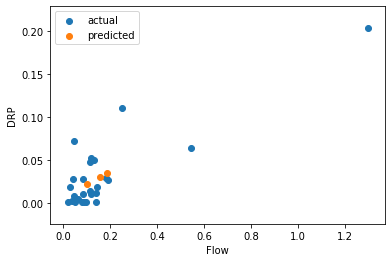

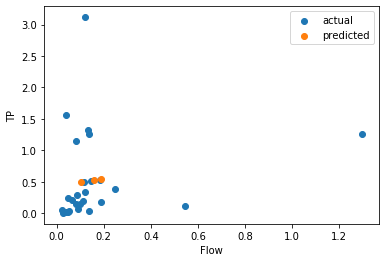

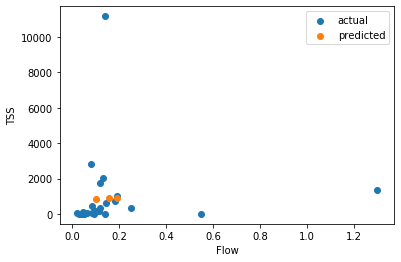

In [219]:
analytes = ['DRP', 'TP', 'TSS']

for x in analytes:
    plt.scatter(data_11['Flow'], data_11[x], label='actual')
    plt.scatter(predictions_11['Flow'], predictions_11[x], label='predicted')
    plt.legend()
    plt.xlabel('Flow')
    plt.ylabel(x)
    plt.show()

In [220]:
data_11.shape

(26, 6)

In [221]:
merged_11 = pd.concat([data_11, predictions_11], sort=True)
merged_11 = merged_11.sort_values(by=['Date'])
merged_11.shape

(29, 6)

In [223]:
# predict values and export the values into a dataframe for S12
list_of_comparisons = ['DRP ~ Flow', 'TP ~ Flow', 'TSS ~ Flow']
predictions_12 = pd.DataFrame(columns=list(list_of_comparisons))

for x in list_of_comparisons:
    result = smf.ols(formula=x, data=data_12).fit()
    prednull_12 = result.predict(data_12_null['Flow'])
    predictions_12.loc[:, x] = prednull_12    

# add the values back into this new dataframe - getting the dataframe ready to merge with the main dataframe
predictions_12 ['Flow'] = data_12_null ['Flow']
predictions_12 ['Date'] = data_12_null ['Date']
predictions_12 ['Site'] = 'S12'
predictions_12 = predictions_12.rename(columns={'DRP ~ Flow': 'DRP', 'TP ~ Flow': 'TP', 'TSS ~ Flow': 'TSS'})
predictions_12.shape

(4, 6)

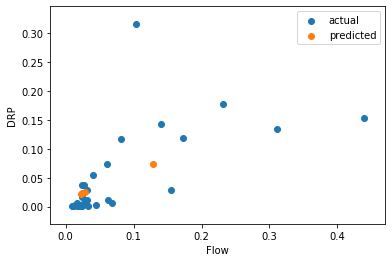

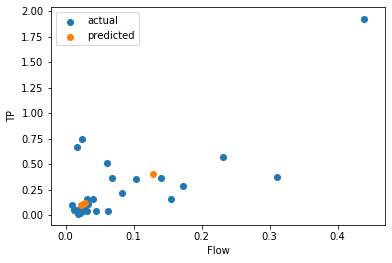

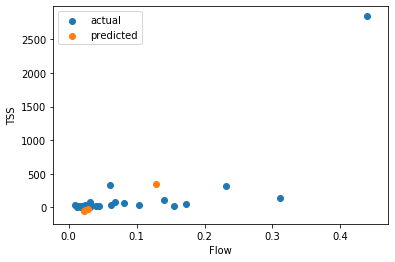

In [222]:
analytes = ['DRP', 'TP', 'TSS']

for x in analytes:
    plt.scatter(data_12['Flow'], data_12[x], label='actual')
    plt.scatter(predictions_12['Flow'], predictions_12[x], label='predicted')
    plt.legend()
    plt.xlabel('Flow')
    plt.ylabel(x)
    plt.show()

In [225]:
merged_12 = pd.concat([data_12, predictions_12], sort=True)
merged_12 = merged_12.sort_values(by=['Date'])
merged_12.shape

(36, 6)

In [229]:
# merge all the data back together
final_merged = pd.concat([merged_11, merged_12])
print(final_merged.shape)
print(final_merged.isnull().sum())

(65, 6)
DRP     0
Date    0
Flow    0
Site    0
TP      0
TSS     0
dtype: int64


# Discussion for objective 2
<font color='red'>
From the figures above where predicted and actual values were plotted: <br>
1) S11-DRP - worked well <br>
2) S11-TP - worked okay (within somewhat expected range, but the model had weak R2 and p-value) <br>
3) S11-TSS - worked okay (within somewhat expected range) <br>
4) S12- DRP - worked well <br>
5) S12 - TP - worked well <br>
6) S12 - TSS - did not work at all (some of the predicted TSS concentrations were negative) <br>

In summary, this OLS model worked well for DRP and TP, but not TSS. Another suitable model is needed to predict TSS concentration. A potential approach is to multiple-linear-regression to incorporate several parameters such as precipitation data (antecedent condition) and time of the year (seasonality - land cover density).
</font>